## Importing the required libraries

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

### Reading the training and testing data set as a data frame

In [2]:
train = pd.read_csv('titanic_train.csv')
test = pd.read_csv('titanic_test.csv')

### Getting an overview of the training and test dataset

In [3]:
train.head()


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## Exploring the distribution of various features in the dataset

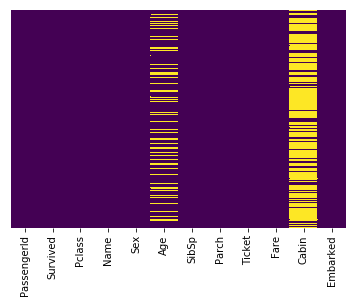

In [5]:
sns.heatmap(train.isnull(),cbar=False,cmap = 'viridis',yticklabels=False)

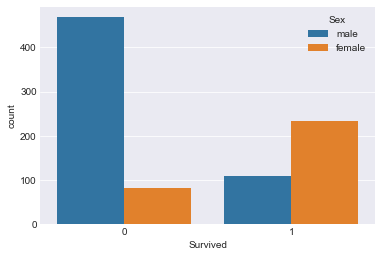

In [6]:
sns.set_style('darkgrid')
sns.countplot(data = train,x='Survived',hue = 'Sex')

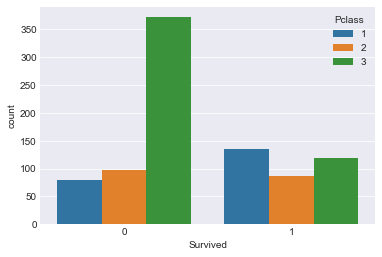

In [7]:
sns.countplot(x = 'Survived',data=train,hue='Pclass')

C:\Users\hcl\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


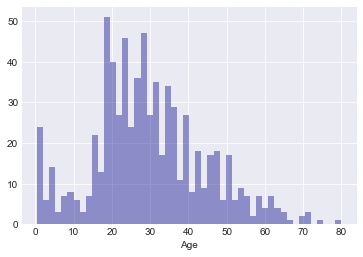

In [8]:
sns.distplot(train['Age'].dropna(),kde = False,bins= 50,color = 'darkblue')

####  Distribution of age across the data set. We can get an insight that people around the age of 20-40 is spread more across the dataset

####  Let us grab a quick overview about the entire dataset and the data tyoe of each column

In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 66.2+ KB


####  Getting a knowledge about the distribution of fare in the data set

C:\Users\hcl\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


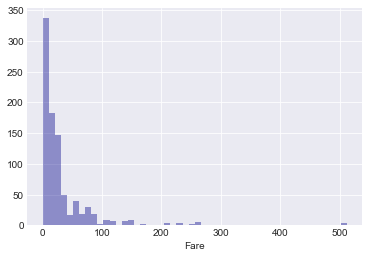

In [10]:
sns.distplot(train['Fare'],kde = False,color = 'darkblue')

#### Distribution of the Sibling numbers in the data set

C:\Users\hcl\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6462: UserWarning: The 'normed' kwarg is deprecated, and has been replaced by the 'density' kwarg.
  warnings.warn("The 'normed' kwarg is deprecated, and has been "


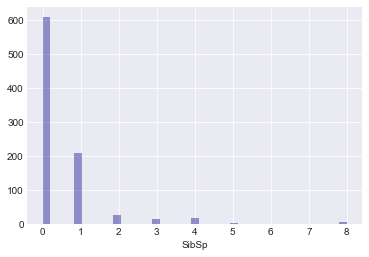

In [11]:
sns.distplot(train['SibSp'],kde = False,color = 'darkblue',label= 'Distribution of sibling count')

### Data cleaning 

#### we can see that age being an important factor contains some NA values. Hence this can be processed by filling the mean ages of according to the passenger class

In [12]:
mean_age = train[['Pclass','Age']].groupby('Pclass').mean()



In [13]:
def clean_age(data2clean):
    
    pclass = data2clean[0];age = data2clean[1]
    if pd.isnull(age):
        if pclass == 1:
            return mean_age.loc[1]['Age']
        elif pclass == 2:
            return mean_age.loc[2]['Age']
        else:
            return mean_age.loc[3]['Age']
    else:
        return age
    

In [14]:
train['Age'] = train[['Pclass','Age']].apply(clean_age,axis = 1)

mean_age = test[['Pclass','Age']].groupby('Pclass').mean()
test['Age'] = test[['Pclass','Age']].apply(clean_age,axis = 1)


#### Cabin column has too much missing values and leads to distortion even if it is cleaned.Hence it is better to drop the column

In [15]:
train.drop('Cabin',axis=1,inplace= True)
test.drop('Cabin',axis=1,inplace= True)

####  Finally dropping a few values present across the data set

####  Checking the data set for Missing Values graphically after cleaning 

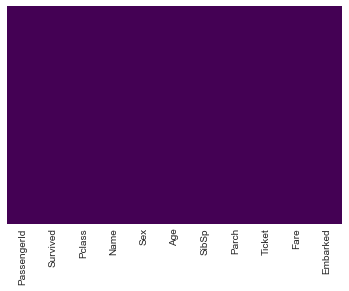

In [16]:
train.dropna(inplace=True)
#test.dropna(inplace=True)
sns.heatmap(train.isnull(),yticklabels= False,cbar = False,cmap = 'viridis')

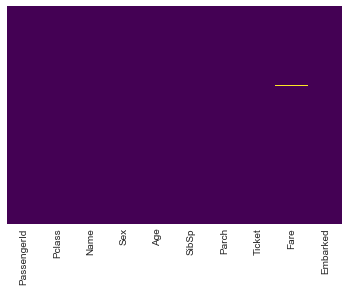

In [17]:
sns.heatmap(test.isnull(),yticklabels= False,cbar = False,cmap = 'viridis')

####  Cleaning the missing value in the column 'Fare'

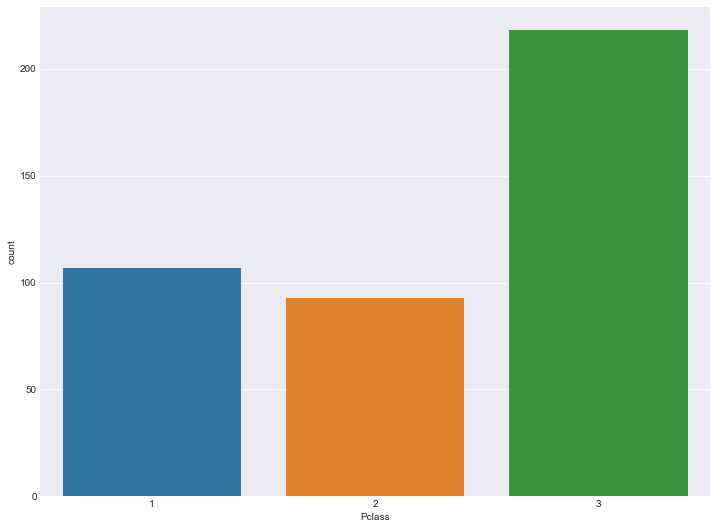

In [31]:
#sns.distplot(test['Fare'].dropna(),kde = False,color = 'darkblue')
#mean_fare = test['Fare'].mean()
#mean_fare
plt.figure(figsize=(12, 9))
sns.countplot(data=test,x='Pclass')

####  The Passenger class Three count is more twice of the other two class hence the mean fare of the passenger class three can be filled for the missing values

In [42]:
mean_fare = test[['Fare','Pclass']].groupby('Pclass').mean()
def clean_fares(col):
    fare = col[0]
    pclass = col[1]
    if pd.isnull(fare):
        if pclass == 1:
            return mean_fare.loc[1]['Fare']
        elif pclass == 2:
            return mean_fare.loc[2]['Fare']
        else:
            return mean_fare.loc[3]['Fare']
    else:
        return fare


In [43]:
test['Fare'] = test[['Fare','Pclass']].apply(clean_fares,axis = 1)                                  

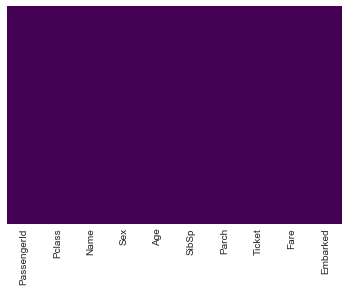

In [44]:
sns.heatmap(test.isnull(),yticklabels= False,cbar = False,cmap = 'viridis')

### Converting categorical values

In [45]:
sex_train = pd.get_dummies(train['Sex'],drop_first=True)
sex_test = pd.get_dummies(test['Sex'],drop_first=True)

In [46]:
embark_train = pd.get_dummies(train['Embarked'],drop_first=True)
embark_test = pd.get_dummies(test['Embarked'],drop_first=True)

In [47]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S


In [48]:
train.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace= True)
test.drop(['Name','Sex','Ticket','Embarked'],axis=1,inplace= True)

In [49]:
train = pd.concat([train,sex_train,embark_train],axis=1)
train.head()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,1,0,3,22.0,1,0,7.2500,1,0,1
1,2,1,1,38.0,1,0,71.2833,0,0,0
2,3,1,3,26.0,0,0,7.9250,0,0,1
3,4,1,1,35.0,1,0,53.1000,0,0,1
4,5,0,3,35.0,0,0,8.0500,1,0,1


In [50]:
test = pd.concat([test,sex_test,embark_test],axis=1)
test.head()

,PassengerId,Pclass,Age,SibSp,Parch,Fare,male,Q,S
0,892,3,34.5,0,0,7.8292,1,1,0
1,893,3,47.0,1,0,7.0000,0,0,1
2,894,2,62.0,0,0,9.6875,1,1,0
3,895,3,27.0,0,0,8.6625,1,0,1
4,896,3,22.0,1,1,12.2875,0,0,1


###  Setting up training and testing data sets for actual training of the model

In [51]:
#from sklearn.model_selection import train_test_split

In [52]:
#x_train,x_test,y_train,y_test = train_test_split(train.drop('Survived',axis = 1),train['Survived'],test_size = 0.30,random_state = 101)
x_train = train.drop('Survived',axis = 1)
y_train = train['Survived']
x_test = test

In [53]:
from sklearn.linear_model import LogisticRegression

In [54]:
logmodel = LogisticRegression()

####  Training the machine learning model with the training data

In [55]:
logmodel.fit(x_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

####  Using the model to predict the test data

In [56]:
y_test = logmodel.predict(x_test)

#### Getting the accuracy of the model

In [57]:
logmodel.score(x_train,y_train)

0.8065241844769404